In [19]:
#numpy,pandas,scipy, math, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

from scipy import linalg

from sklearn.covariance import LedoitWolf, OAS, ShrunkCovariance, \
    log_likelihood, empirical_covariance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [20]:
defaultCredit= pd.read_csv('dataset/rawDefaultCreditCardClients.csv')
defaultCredit = defaultCredit.drop(defaultCredit.columns[0], axis=1)
defaultCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [37]:
 defaultCredit.cov()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
LIMIT_BAL,1.683446e+10,1571.050630,-22322.227579,-7323.669658,173076.722569,-39545.930009,-46037.648360,-44432.253315,-40571.811859,-36670.562325,...,2.453926e+09,2.331481e+09,2.243837e+09,4.195711e+08,5.333504e+08,4.801180e+08,4.131202e+08,4.305657e+08,5.065153e+08,-8267.551759
SEX,1.571051e+03,0.239247,0.004962,-0.008014,-0.409726,-0.031685,-0.041442,-0.038694,-0.034411,-0.030521,...,-6.884896e+02,-5.056943e+02,-4.874302e+02,-1.964266e+00,-1.567550e+01,-7.403481e+01,-1.708011e+01,-1.245881e+01,-2.405188e+01,-0.008113
EDUCATION,-2.232223e+04,0.004962,0.554272,-0.057954,1.251988,0.094202,0.115604,0.109088,0.101430,0.087814,...,-2.936362e+02,-5.630082e+02,-5.607123e+02,-5.066679e+02,-5.625250e+02,-5.806080e+02,-4.776040e+02,-5.134324e+02,-5.831578e+02,0.010458
MARRIAGE,-7.323670e+03,-0.008014,-0.057954,0.272452,-1.992764,0.011683,0.015122,0.020421,0.020213,0.021074,...,-7.838816e+02,-8.058409e+02,-6.592233e+02,-5.169161e+01,-9.732797e+01,-3.254608e+01,-1.035182e+02,-9.607709e+00,-6.162327e+01,-0.005273
AGE,1.730767e+05,-0.409726,1.251988,-1.992764,84.969755,-0.408639,-0.553408,-0.585263,-0.535851,-0.562245,...,3.045311e+04,2.765407e+04,2.613765e+04,3.992042e+03,4.626862e+03,4.746824e+03,3.087324e+03,3.218052e+03,3.191904e+03,0.053143
PAY_1,-3.954593e+04,-0.031685,0.094202,0.011683,-0.408639,1.262930,0.904330,0.772384,0.707972,0.648743,...,1.295025e+04,1.234167e+04,1.184476e+04,-1.475495e+03,-1.815138e+03,-1.396168e+03,-1.126848e+03,-9.991077e+02,-1.172194e+03,0.151499
PAY_2,-4.603765e+04,-0.041442,0.115604,0.015122,-0.553408,0.904330,1.433254,1.098371,0.926680,0.844886,...,1.711630e+04,1.611095e+04,1.564288e+04,-1.600241e+03,-1.627192e+03,-1.178331e+03,-8.788439e+02,-6.784685e+02,-7.768350e+02,0.130960
PAY_3,-4.443225e+04,-0.038694,0.109088,0.020421,-0.585263,0.772384,1.098371,1.432492,1.087761,0.931455,...,1.749410e+04,1.638295e+04,1.584709e+04,2.566847e+01,-1.841953e+03,-1.123429e+03,-8.637622e+02,-6.557960e+02,-7.630260e+02,0.116867
PAY_4,-4.057181e+04,-0.034411,0.101430,0.020213,-0.535851,0.707972,0.926680,1.087761,1.366885,1.086161,...,1.849642e+04,1.726555e+04,1.665159e+04,-1.812956e+02,-5.235817e+01,-1.425205e+03,-7.960357e+02,-5.999916e+02,-5.521373e+02,0.105115
PAY_5,-3.667056e+04,-0.030521,0.087814,0.021074,-0.562245,0.648743,0.844886,0.931455,1.086161,1.284114,...,1.982293e+04,1.858659e+04,1.771569e+04,-1.142817e+02,-8.332449e+01,1.808121e+02,-1.034962e+03,-5.771610e+02,-4.638926e+02,0.096020


In [ ]:
# positive trends of DEFAULT: EDUCATION, AGE, PAY_1 .... PAY_6
# negative trends of DEFAULT: LIMIT_BAL, SEX, MARRIAGE, BILL_AMT1 ... BILL_AMT6, PAY_AMT1 ... PAY_AMT6

In [21]:
#Dependent Variable Training Set (y Training)
y = defaultCredit['DEFAULT']
X = defaultCredit.iloc[:,0:23]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


In [74]:
# #############################################################################
# Compute the likelihood on test data
coloring_matrix = np.random.normal(size=(23, 23))

# spanning a range of possible shrinkage coefficient values
shrinkages = np.logspace(-30, 0, 40)
negative_logliks = [-ShrunkCovariance(shrinkage=s).fit(X_train).score(X_test)
                    for s in shrinkages]

# under the ground-truth model, which we would not have access to in real
# settings
real_cov = np.dot(coloring_matrix.T, coloring_matrix)
emp_cov = empirical_covariance(X_train)
loglik_real = -log_likelihood(emp_cov, linalg.inv(real_cov))
loglik_real

72899406206.337

In [72]:
# #############################################################################
# Compare different approaches to setting the parameter

# GridSearch for an optimal shrinkage coefficient
tuned_parameters = [{'shrinkage': shrinkages}]
cv = GridSearchCV(ShrunkCovariance(), tuned_parameters)
cv.fit(X_train)

# Ledoit-Wolf optimal shrinkage coefficient estimate
lw = LedoitWolf()
loglik_lw = lw.fit(X_train).score(X_test)

# OAS coefficient estimate
oa = OAS()
loglik_oa = oa.fit(X_train).score(X_test)

print(loglik_lw)
print(loglik_oa)

-228.80246934961082
-221.43471116155158


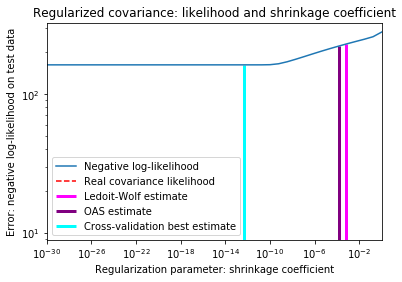

In [73]:
# #############################################################################
# Plot results
fig = plt.figure()
plt.title("Regularized covariance: likelihood and shrinkage coefficient")
plt.xlabel('Regularization parameter: shrinkage coefficient')
plt.ylabel('Error: negative log-likelihood on test data')
# range shrinkage curve
plt.loglog(shrinkages, negative_logliks, label="Negative log-likelihood")

plt.plot(plt.xlim(), 2 * [loglik_real], '--r',
         label="Real covariance likelihood")

# adjust view
lik_max = np.amax(negative_logliks)
lik_min = np.amin(negative_logliks)
ymin = lik_min - 6. * np.log((plt.ylim()[1] - plt.ylim()[0]))
ymax = lik_max + 10. * np.log(lik_max - lik_min)
xmin = shrinkages[0]
xmax = shrinkages[-1]
# LW likelihood
plt.vlines(lw.shrinkage_, ymin, -loglik_lw, color='magenta',
           linewidth=3, label='Ledoit-Wolf estimate')
# OAS likelihood
plt.vlines(oa.shrinkage_, ymin, -loglik_oa, color='purple',
           linewidth=3, label='OAS estimate')
# best CV estimator likelihood
plt.vlines(cv.best_estimator_.shrinkage, ymin,
           -cv.best_estimator_.score(X_test), color='cyan',
           linewidth=3, label='Cross-validation best estimate')

plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.legend()

plt.show()